<a href="https://colab.research.google.com/github/spyrahul01/Tensorflow-in-10-Minutes/blob/main/LicensePlate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import imutils
import easyocr

In [2]:
img = cv2.imread('1_V1YGGM9HryCdnSo1GnqGmA.webp')

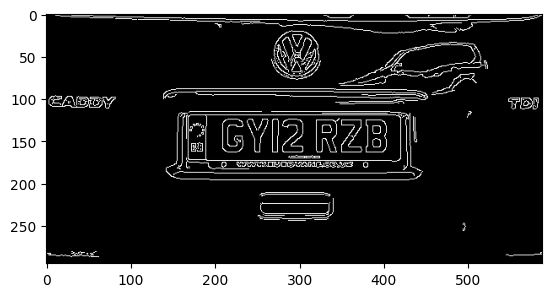

In [11]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))
bfilter = cv2.bilateralFilter(gray, 11, 11, 17)
edged = cv2.Canny(bfilter, 30, 200)
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key = cv2.contourArea, reverse = True)[:10]
location = None
for contour in contours:
  # cv2.approxPolyDP returns a resampled contour, so this will still return a set of (x, y) points
  approx = cv2.approxPolyDP(contour, 10, True)
  if len(approx) == 4:
    location = approx
    break

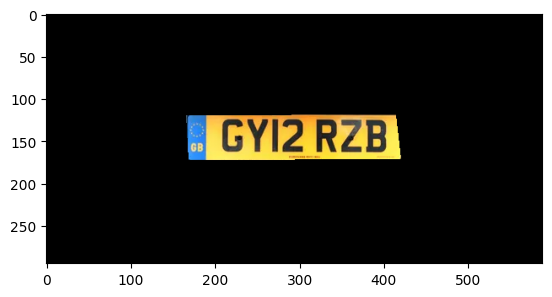

In [12]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0, 255, -1)
new_image = cv2.bitwise_and(img, img, mask = mask)
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

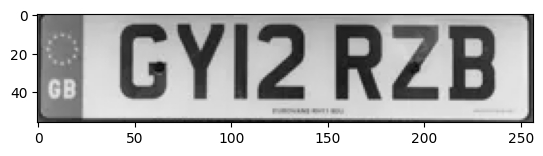

In [13]:
(x, y) = np.where(mask == 255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
# Adding Buffer
cropped_image = gray[x1:x2+3, y1:y2+3]
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete[([[36, 0], [246, 0], [246, 54], [36, 54]], 'GYI2 RZB', 0.8877906452667826)]


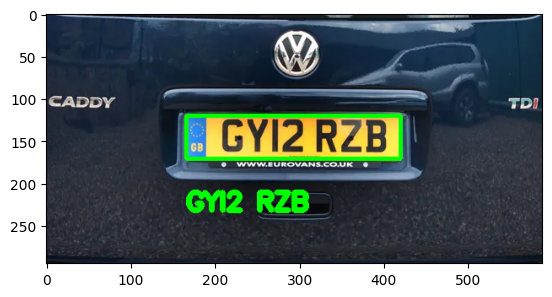

In [14]:
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
print(result)
text = result[0][1]
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img, text = text, org = (approx[0][0][0], approx[1][0][1]+60), fontFace = font, fontScale = 1, color = (0, 255, 0), thickness = 5)
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255, 0), 3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))